<ipython-input-17-ac73b5394583>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


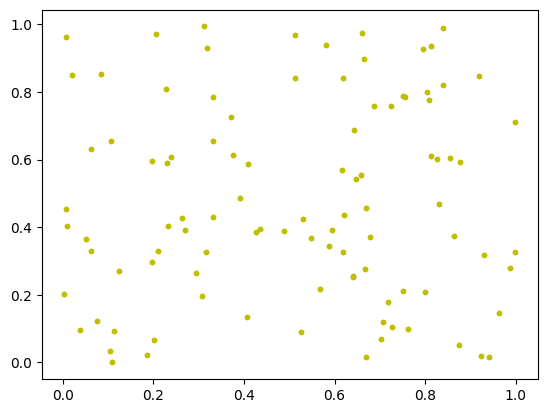

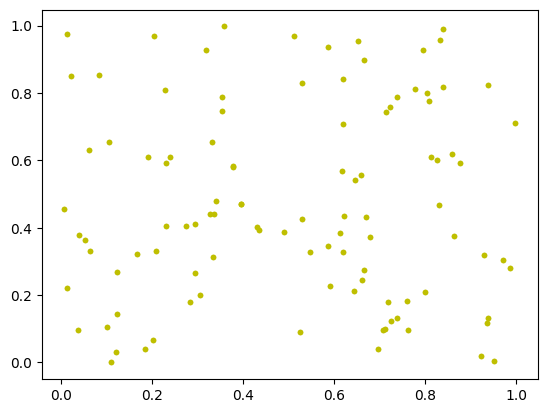

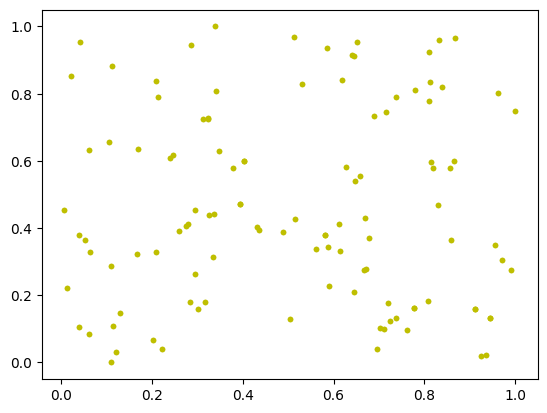

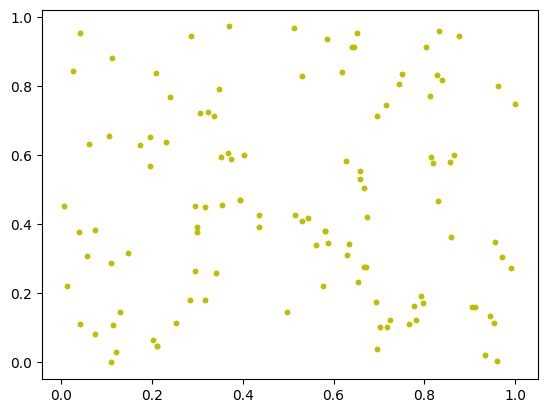

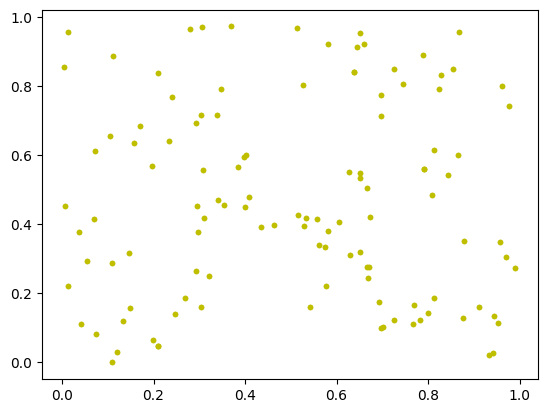

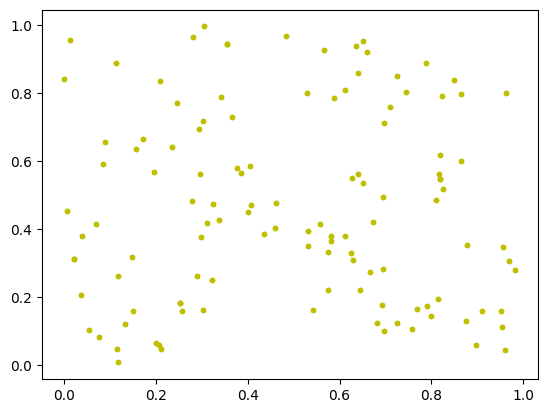

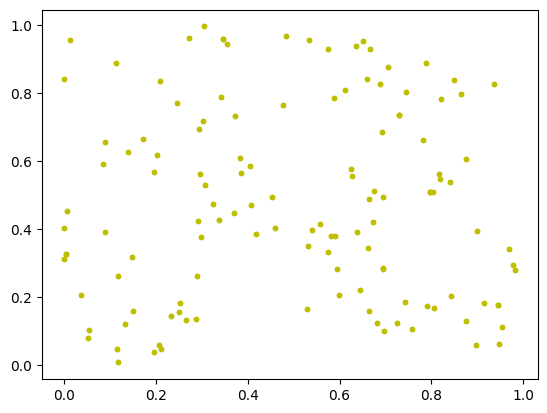

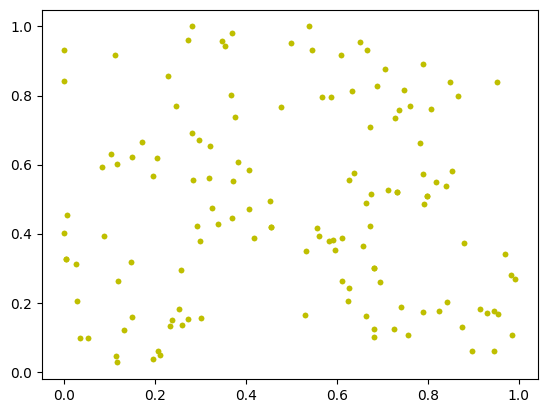

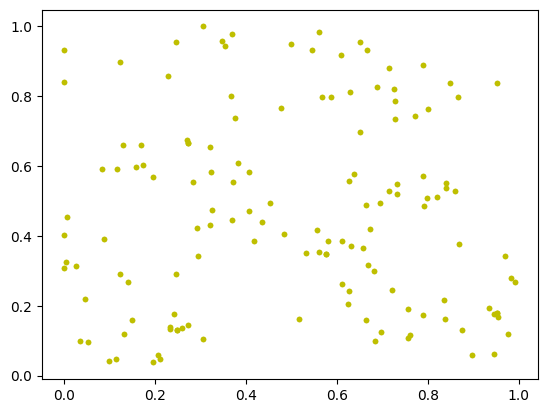

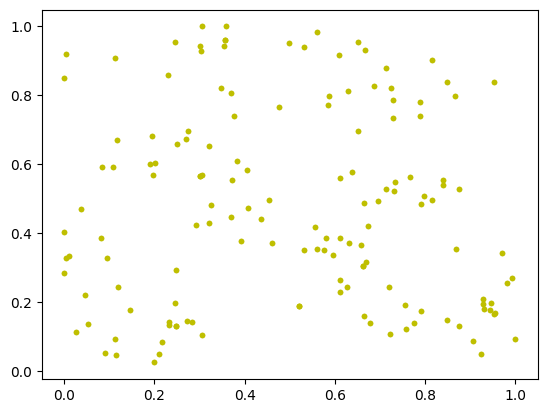

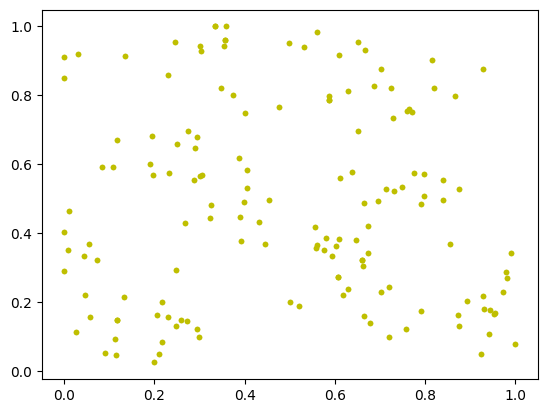

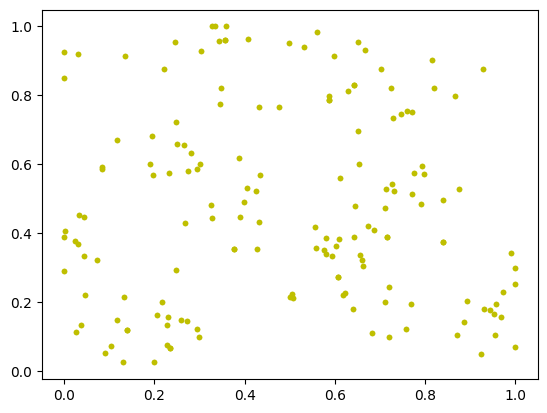

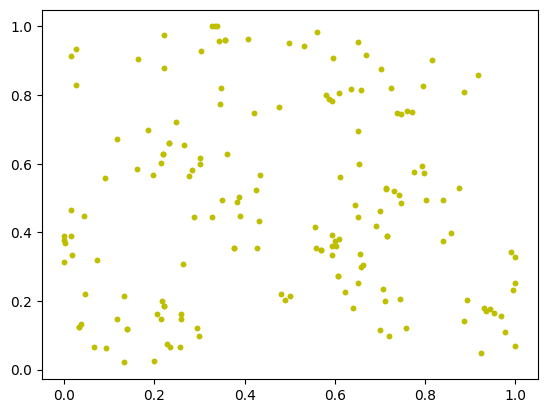

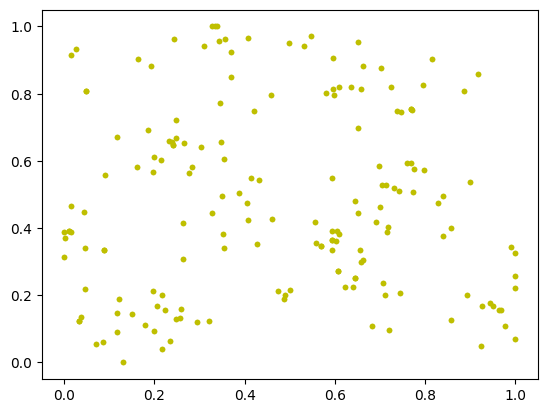

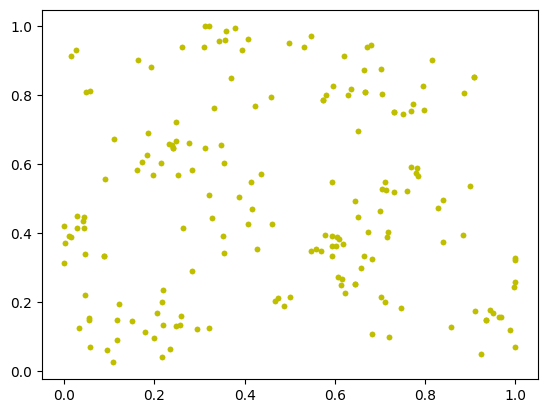

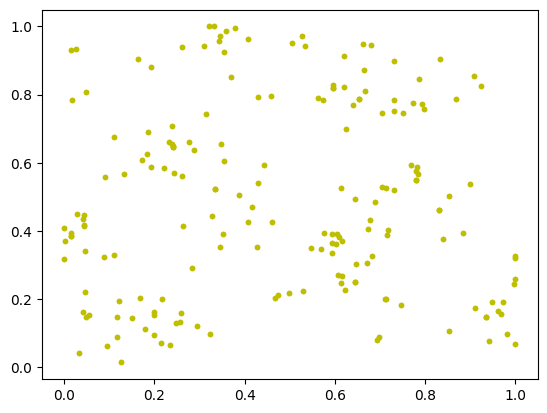

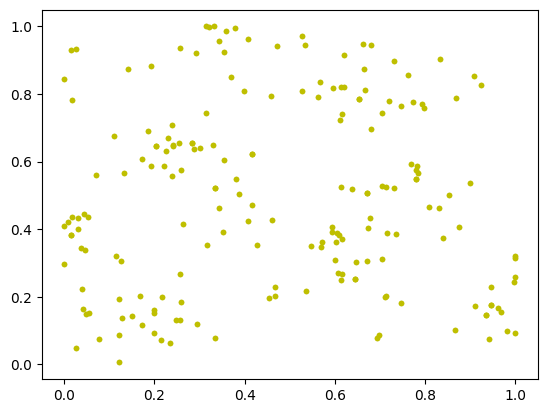

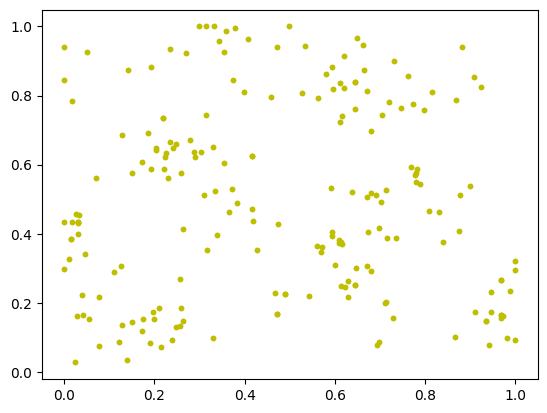

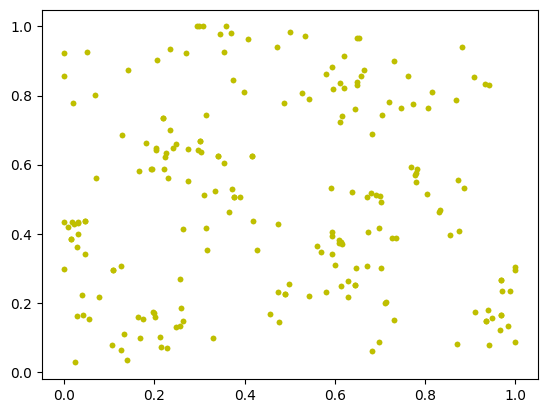

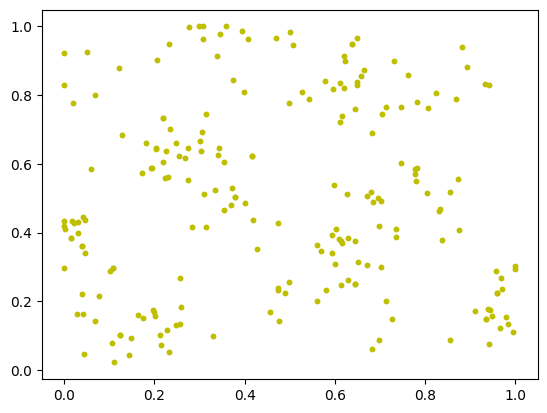

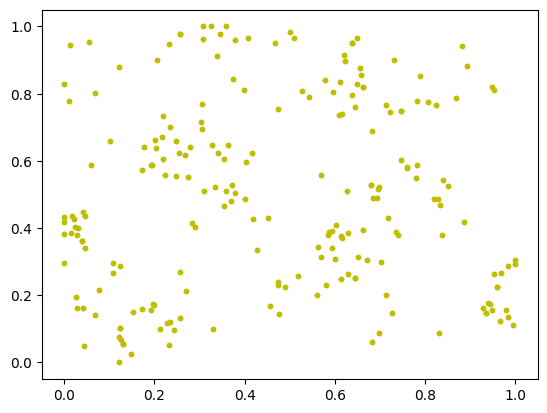

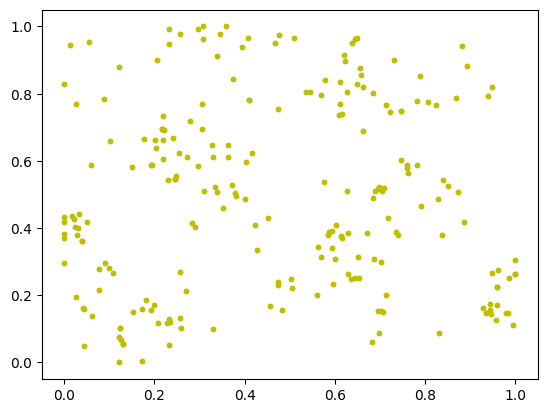

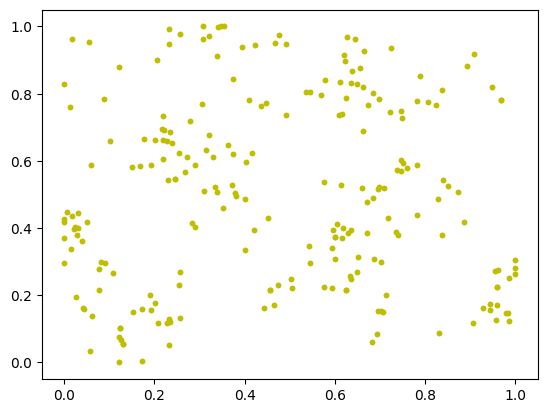

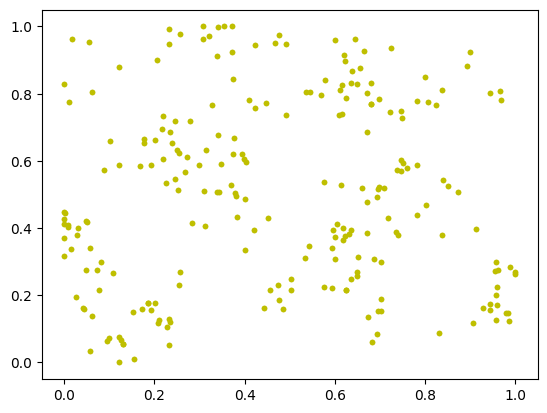

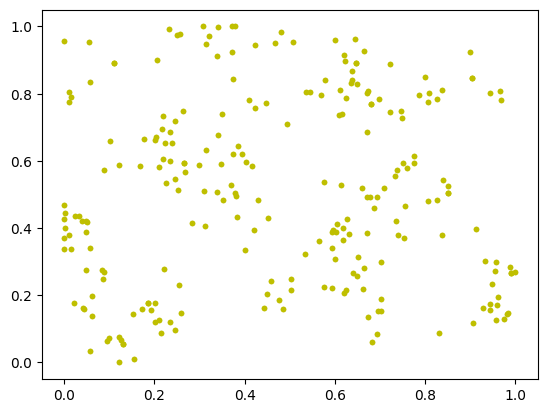

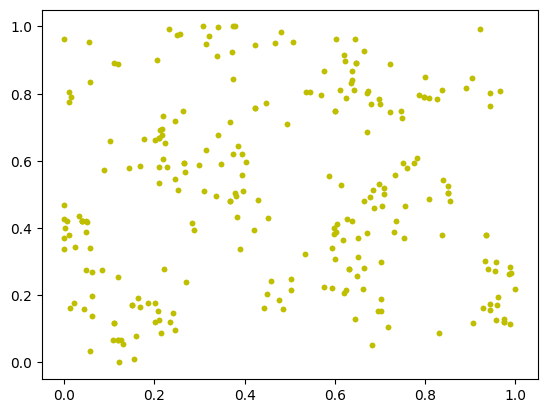

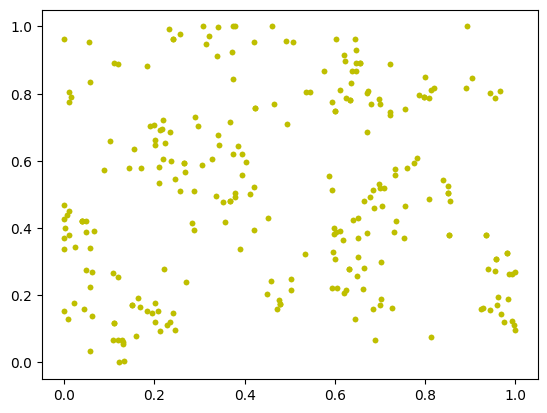

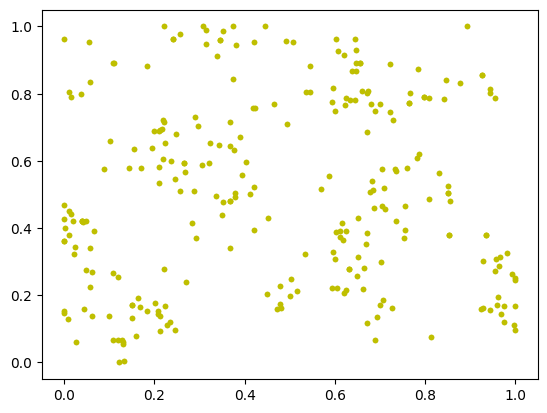

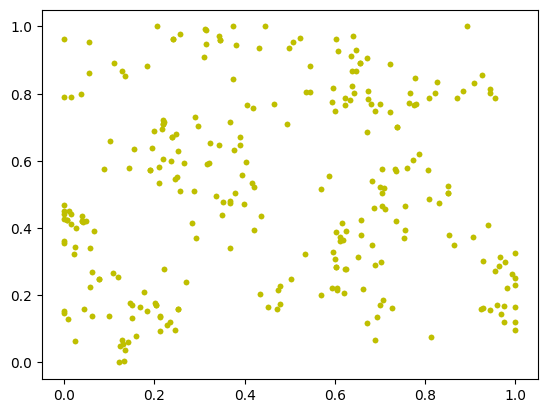

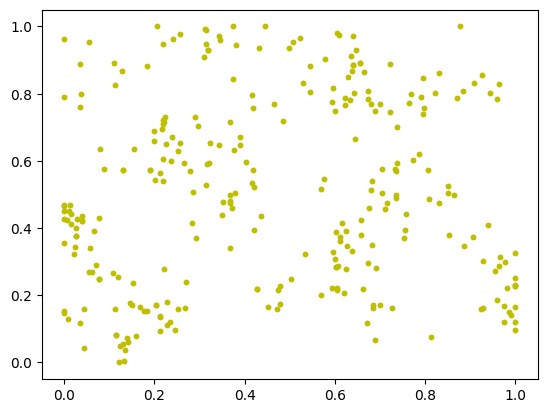

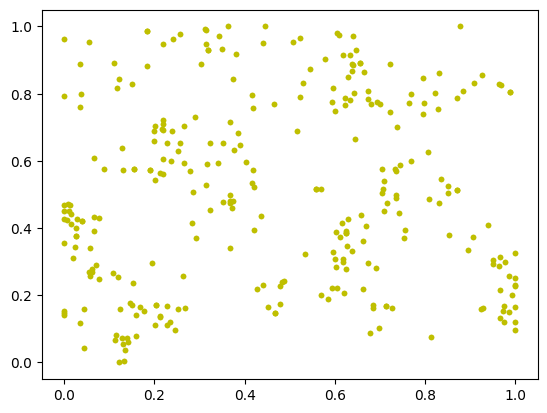

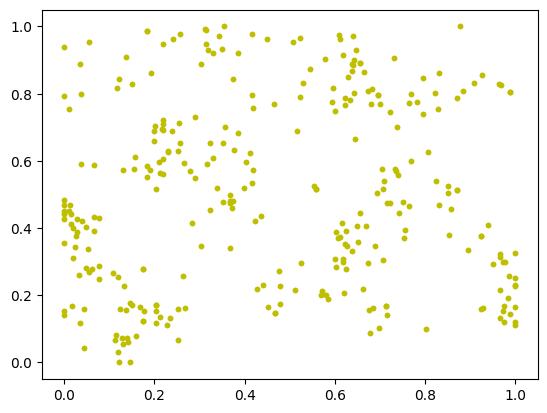

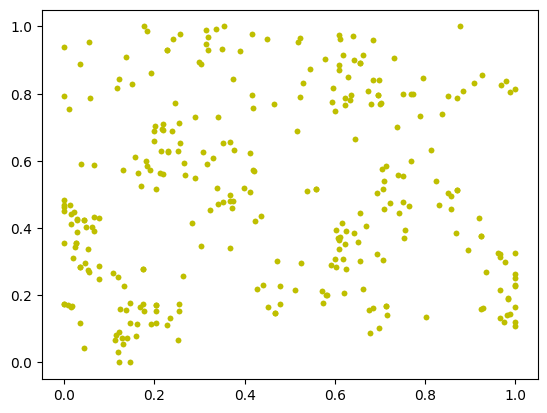

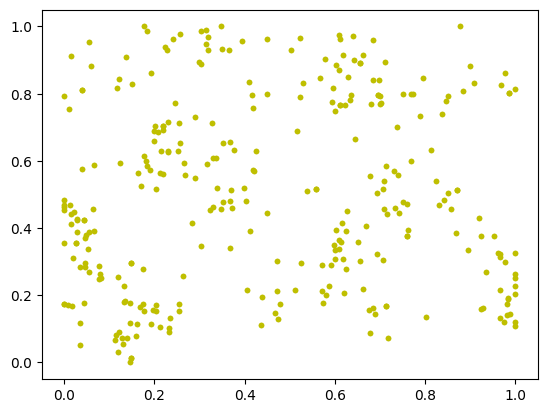

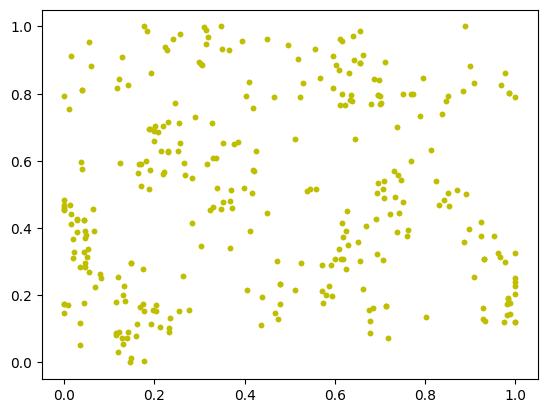

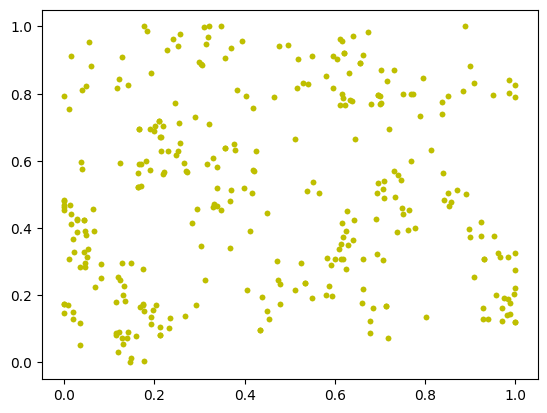

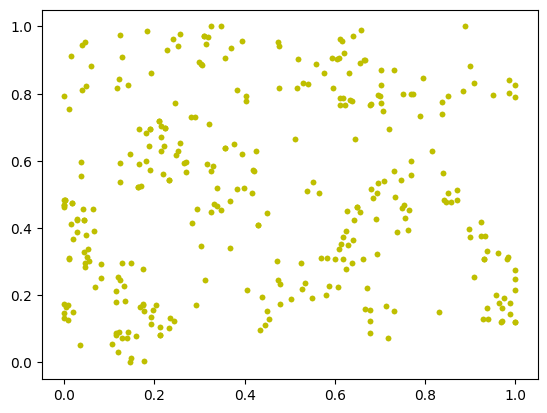

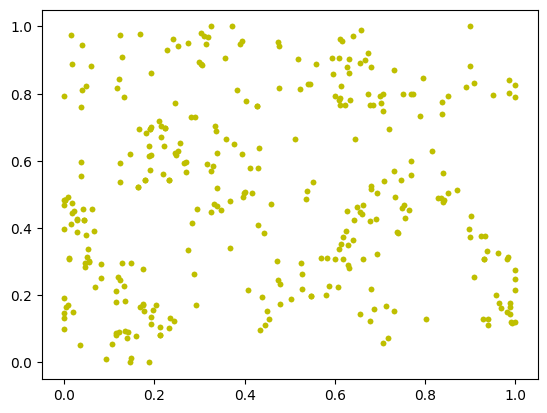

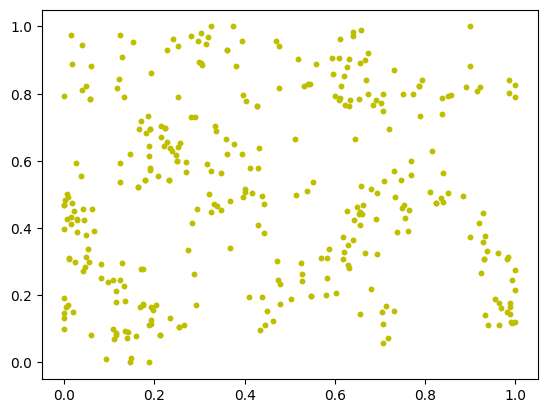

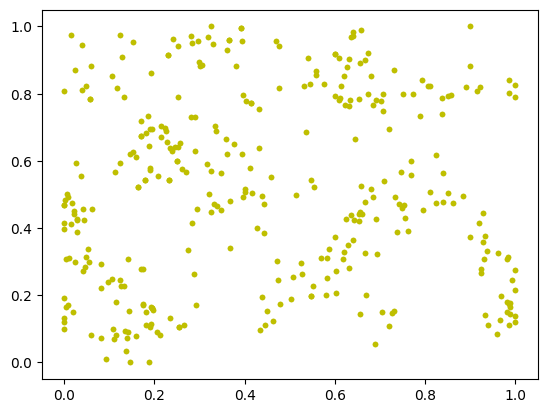

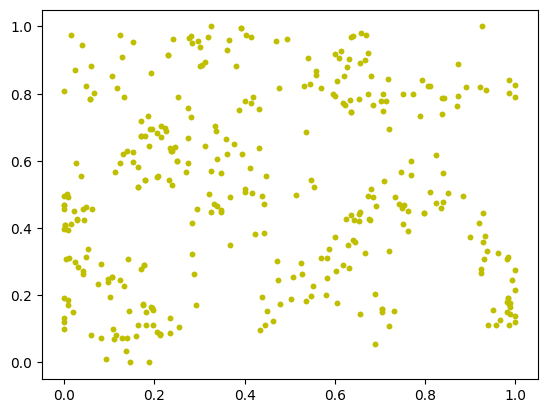

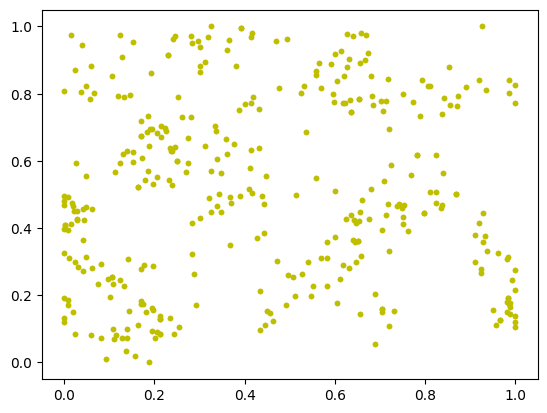

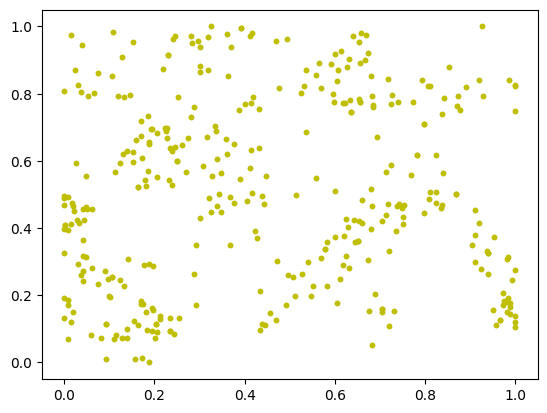

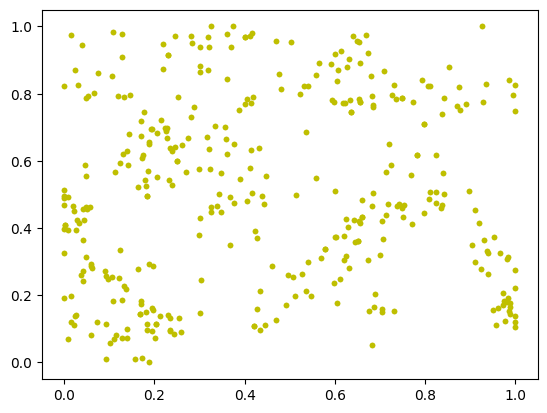

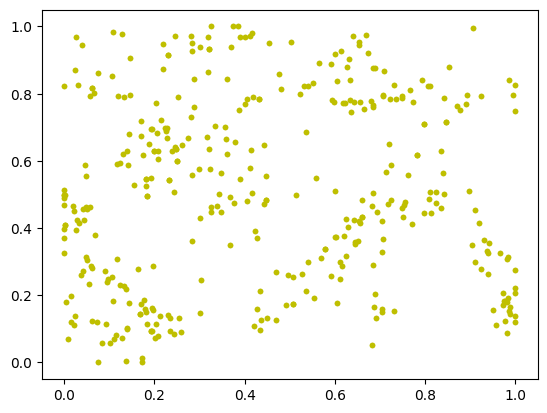

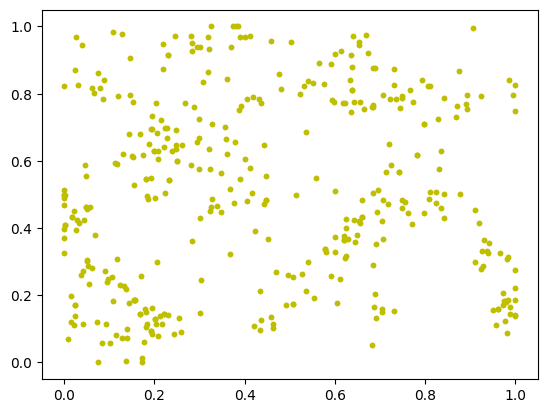

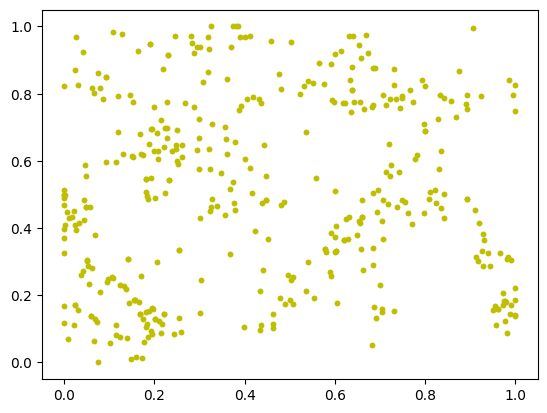

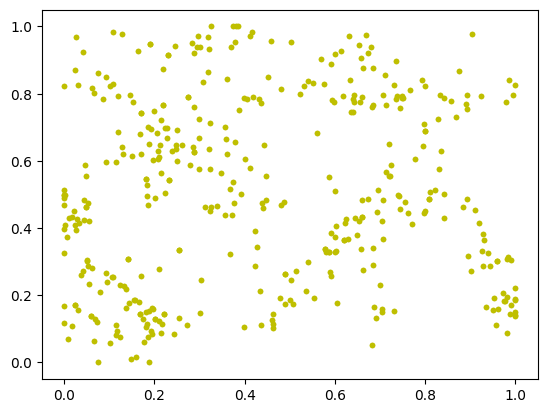

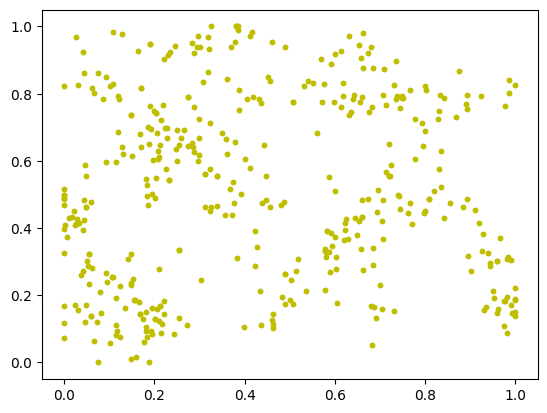

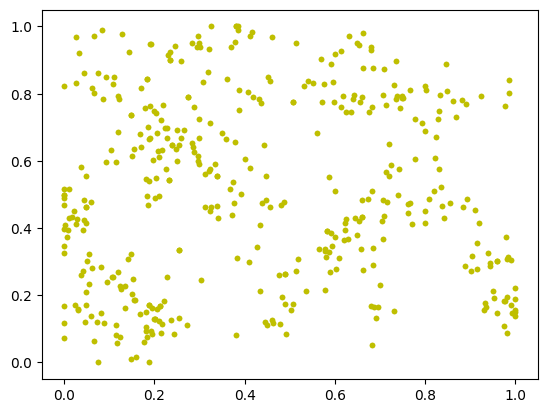

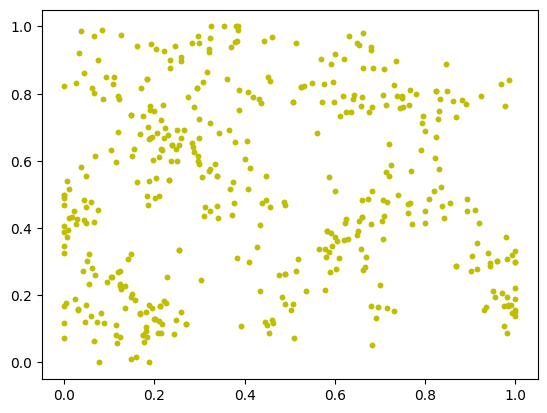

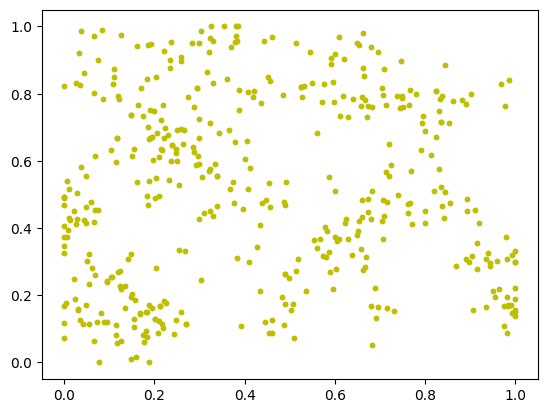

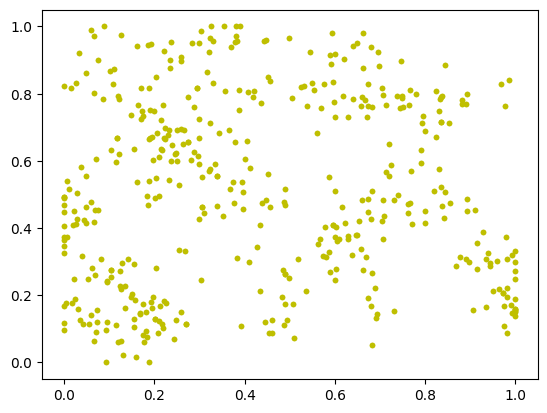

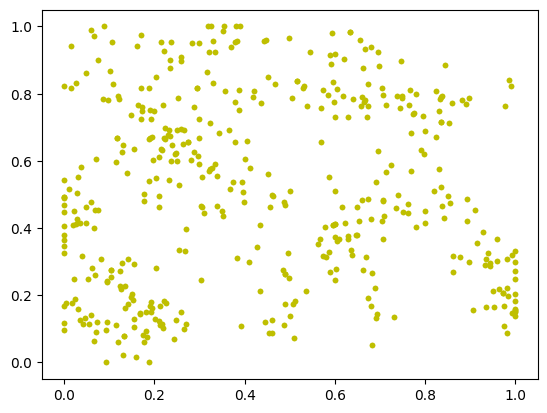

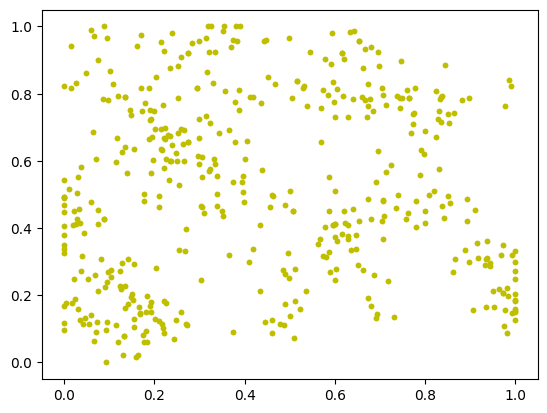

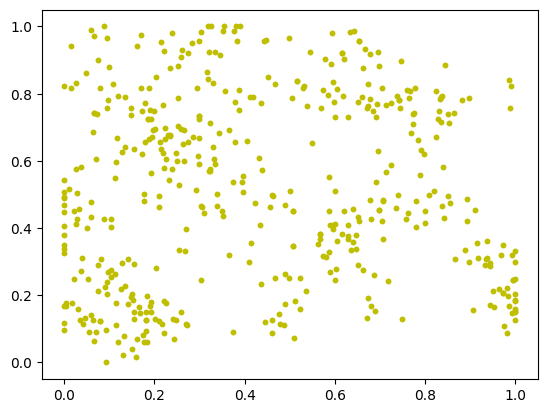

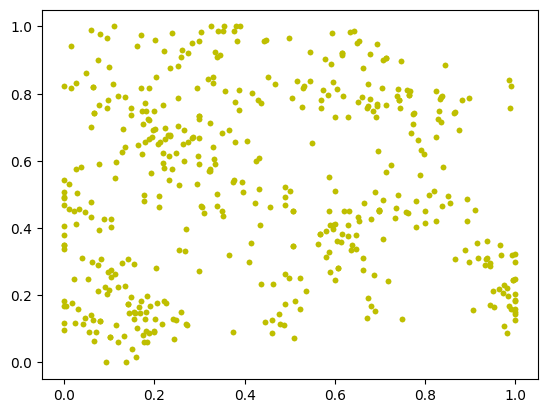

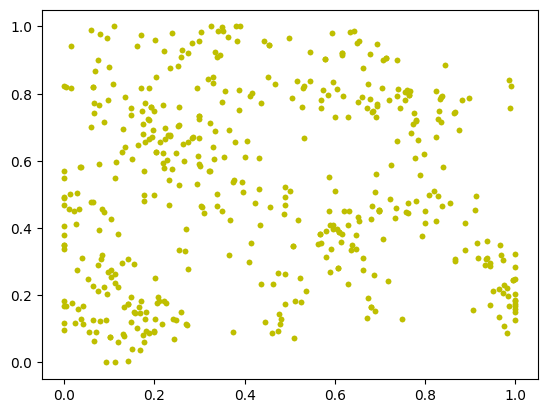

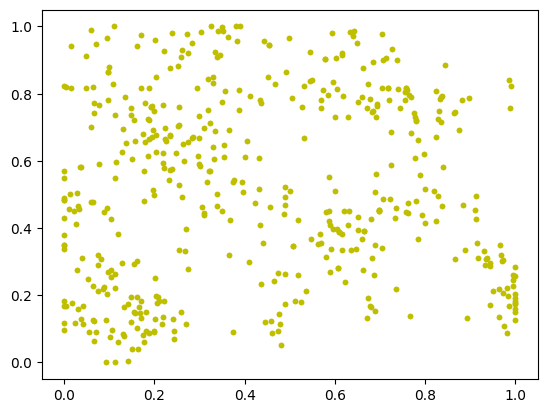

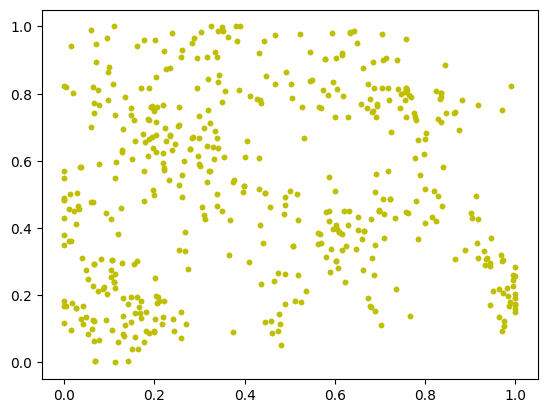

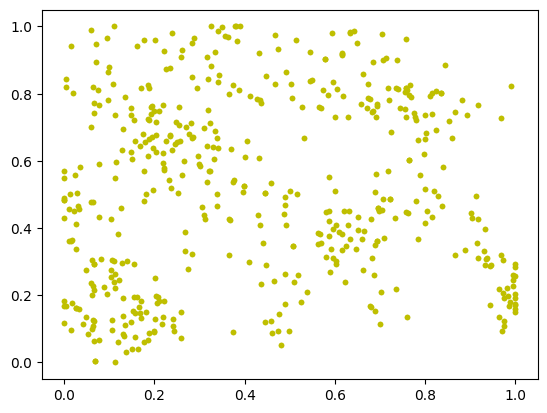

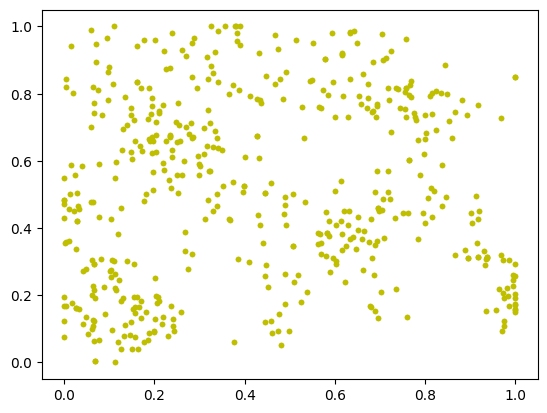

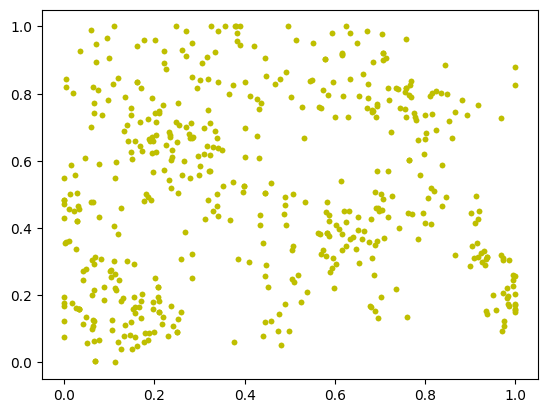

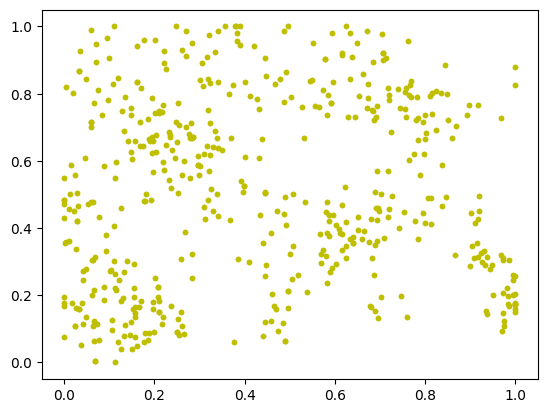

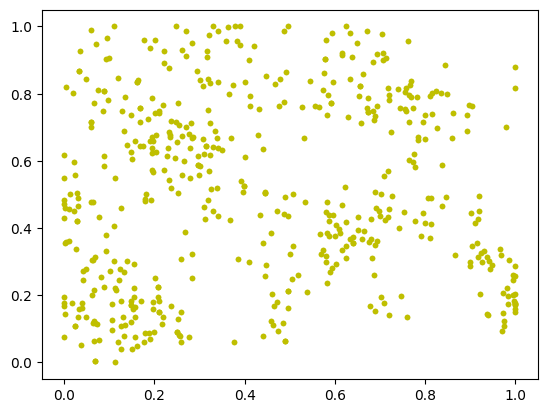

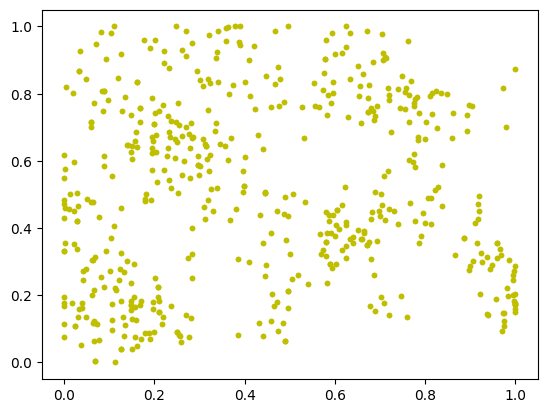

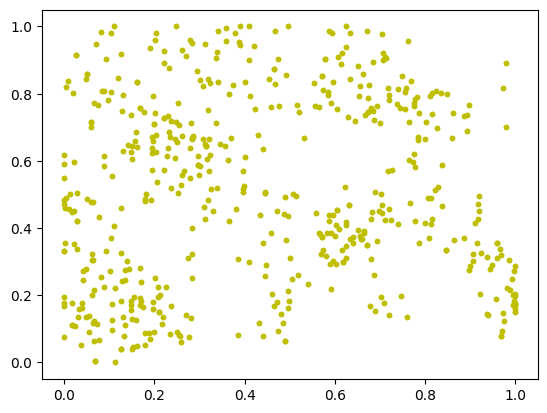

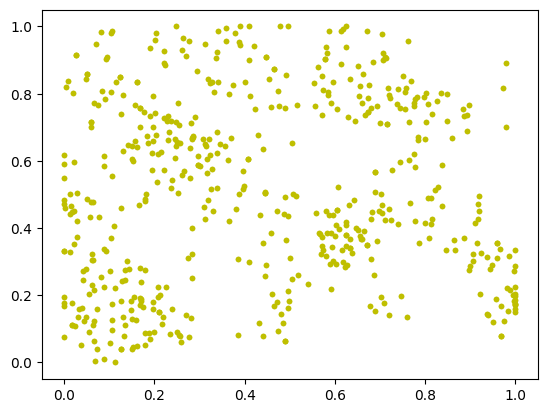

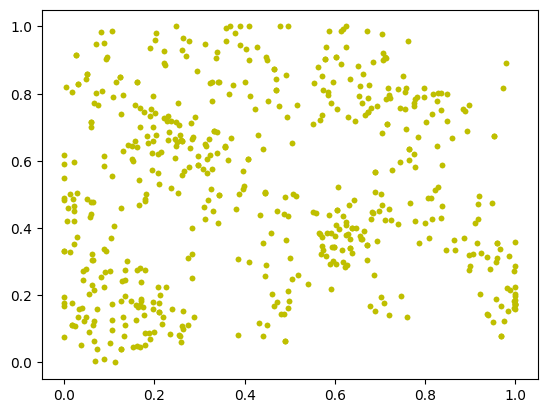

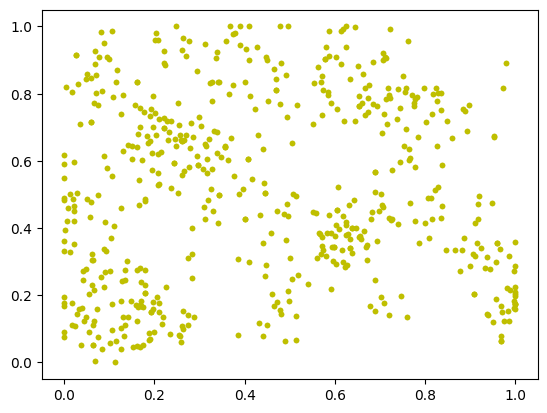

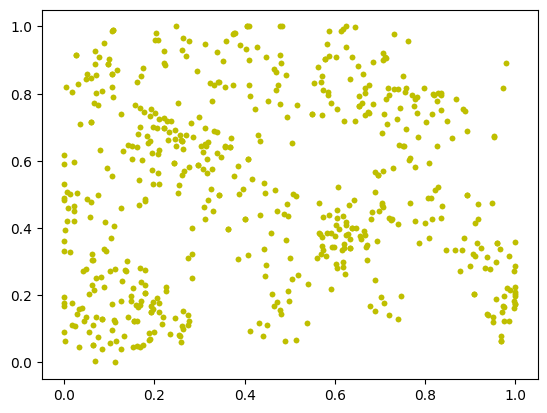

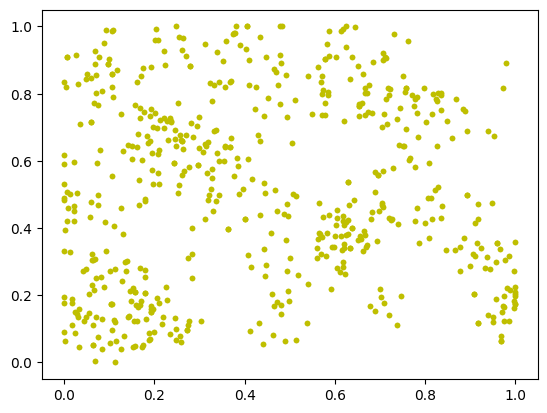

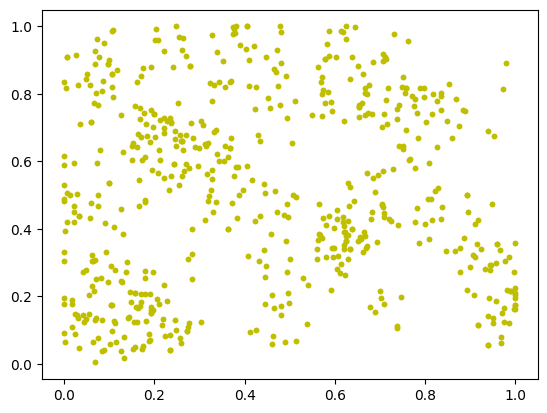

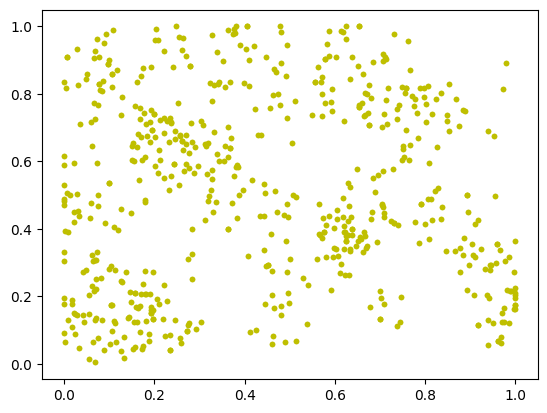

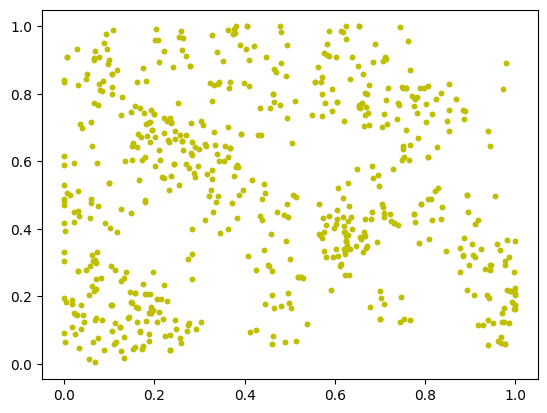

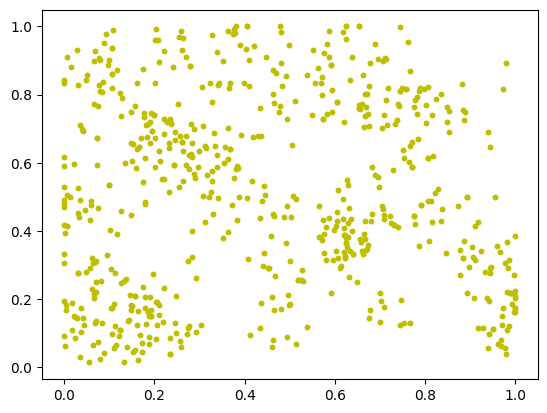

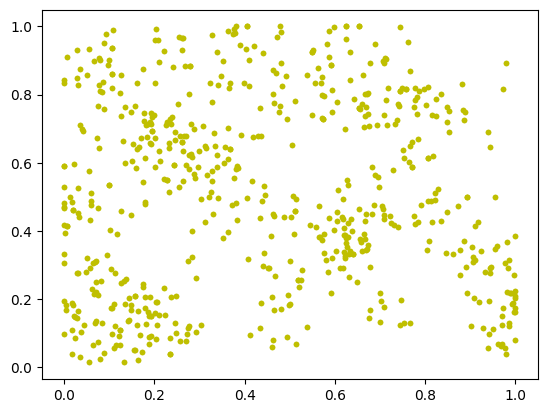

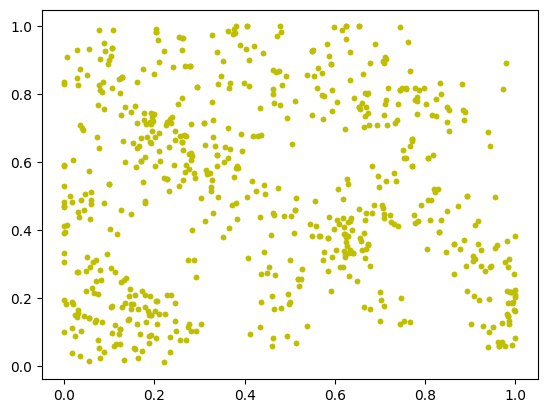

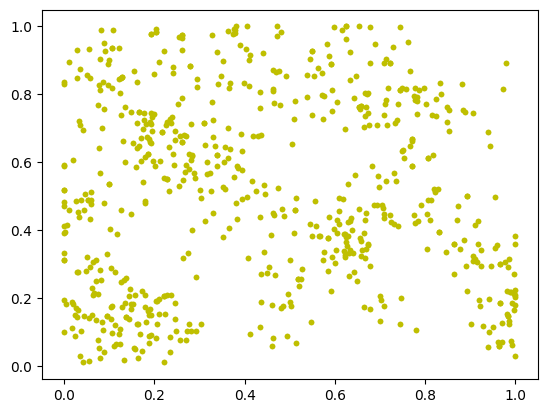

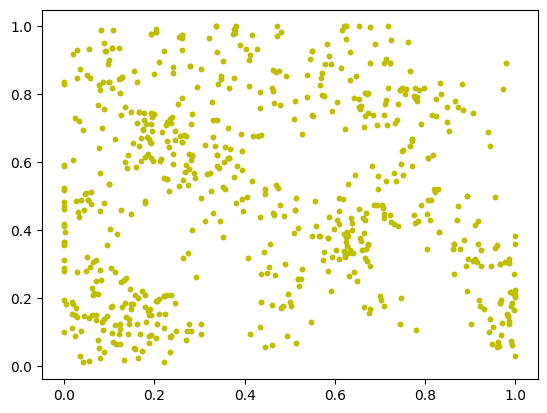

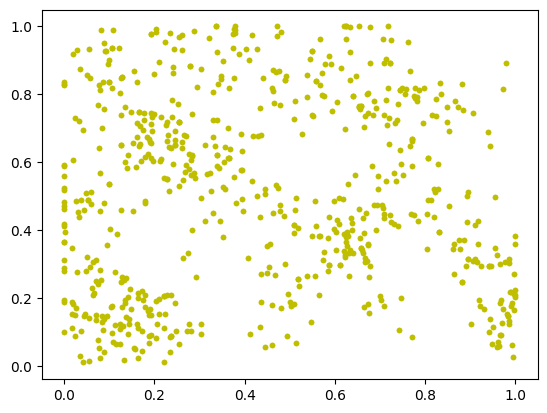

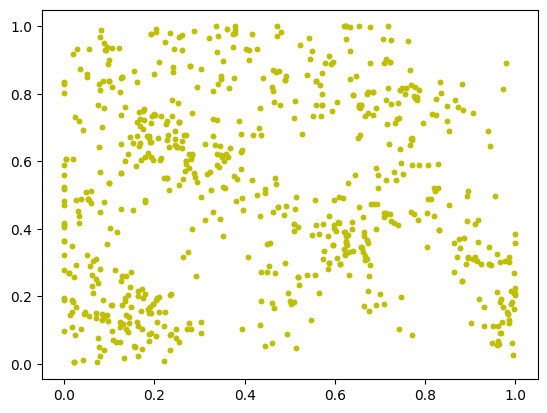

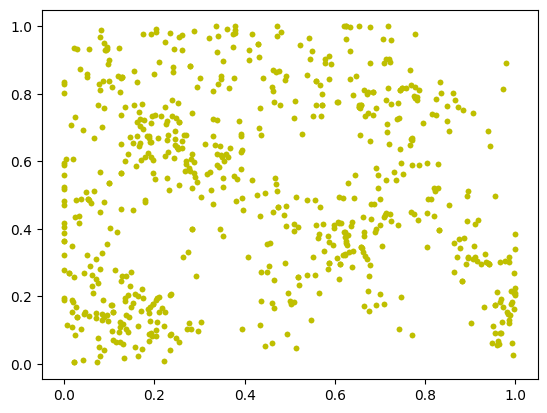

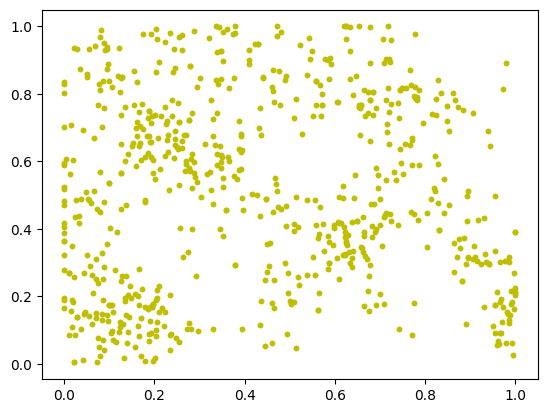

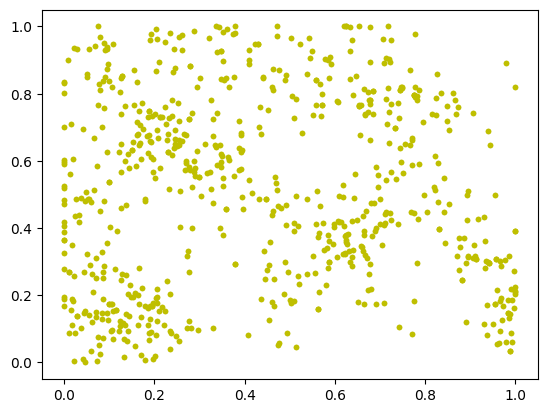

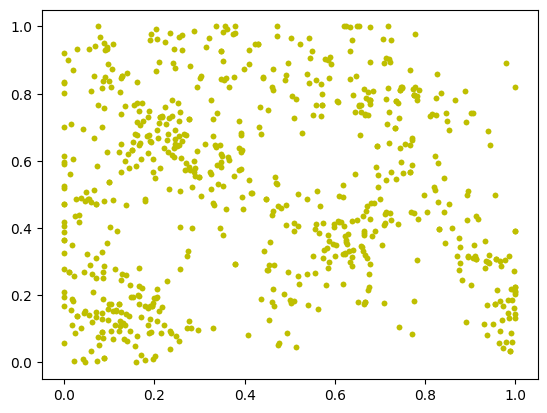

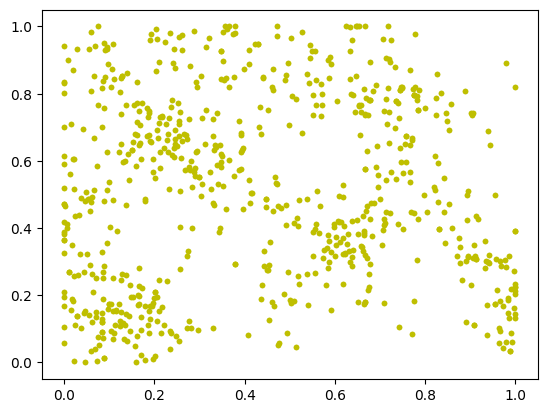

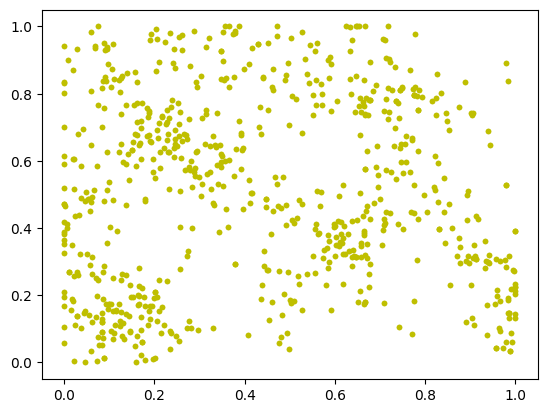

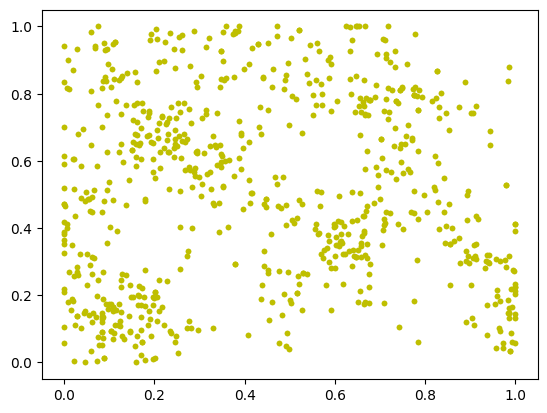

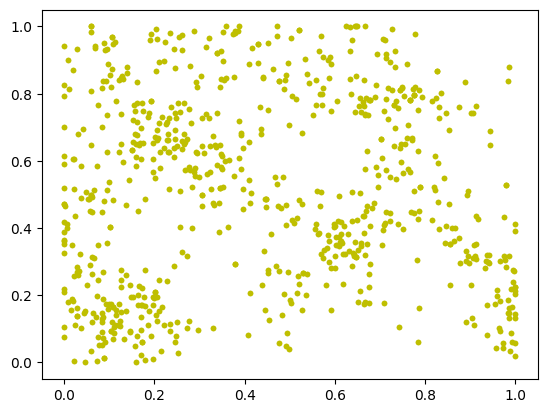

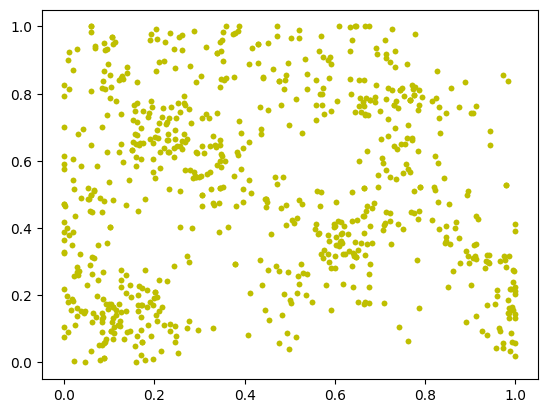

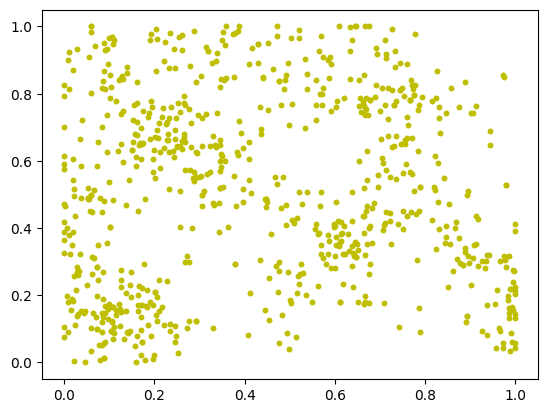

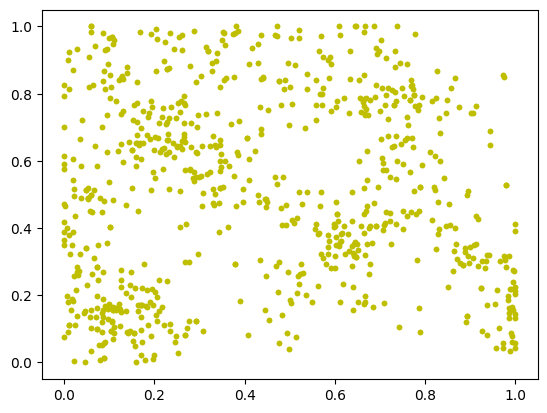

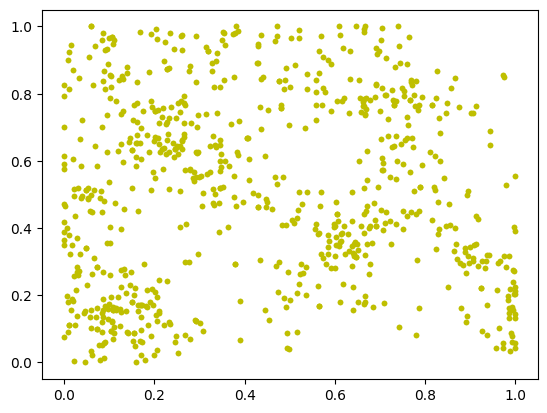

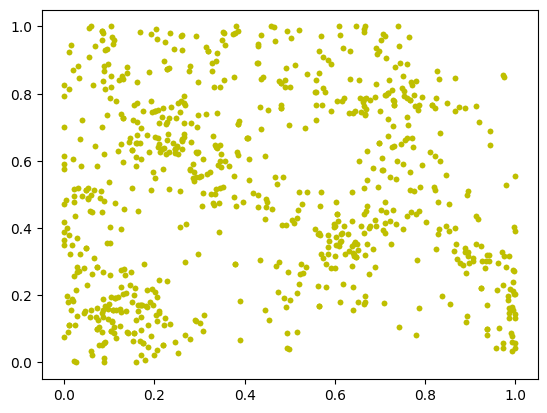

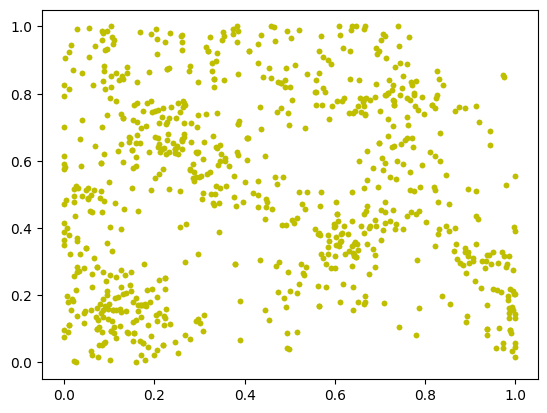

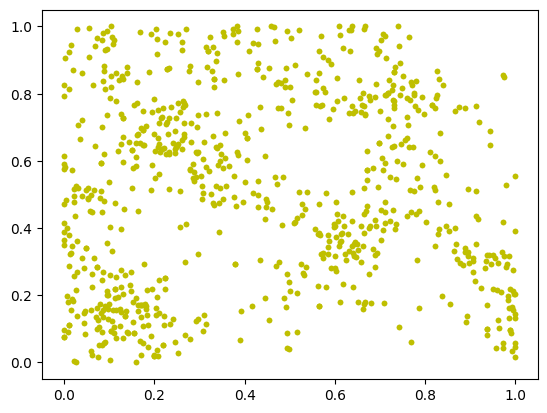

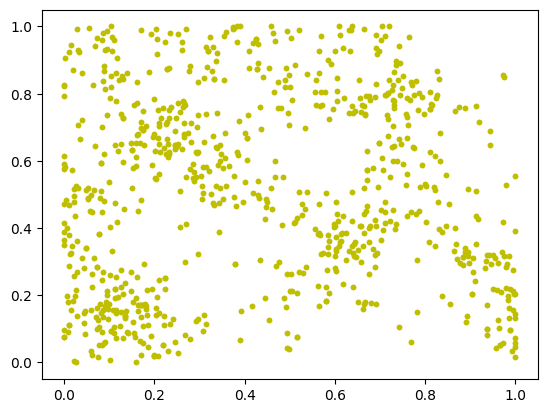

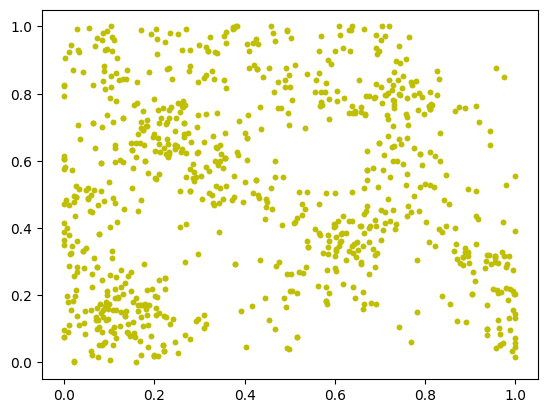

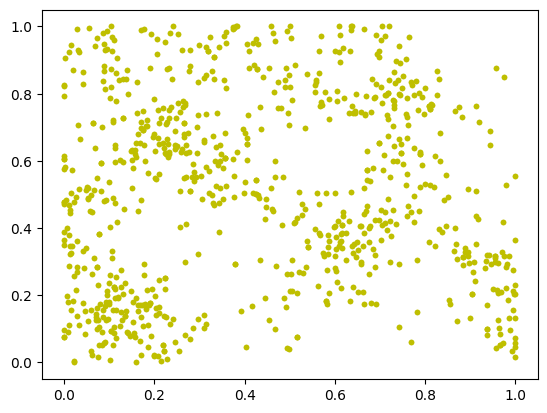

In [ ]:
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

class Animal:
  def __init__(self,x,y,agent_type):
    self.x = x
    self.y = y
    self.agent_type = agent_type
class fox(Animal):
  def __init__(self,x,y):
    super().__init__(x,y,'fox')
class rabbit(Animal):
  def __init__(self,x,y):
    super().__init__(x,y,'rabbit')

def observe():
  plt.figure()
  rabbits = [ag for ag in agents if isinstance(ag,rabbit)]
  if (len(rabbits)>0):
    x = [ag.x for ag in rabbits]
    y = [ag.y for ag in rabbits]
    plt.plot(x,y,'y.')
  foxes = [ag for ag in agents if isinstance(ag,fox)]
  if (len(foxes)>0):
    x = [ag.x for ag in rabbits]
    y = [ag.y for ag in rabbits]
    plt.plot(x,y,'y.')
    pdf.savefig()
    pdf.close

def update(agents):
  if agents == []:
    return
  ag = random.choice(agents)
  ag.x +=random.uniform(-0.03,0.03)
  ag.y +=random.uniform(-0.03,0.03)
  eatDistance = .02
  rabReproductionRate = .1
  foxReproductionRate = .5
  foxStarveChance=.1
  maxRabbits = 10000
  numRabbits = 0

  #x or y may be negative

  if ag.x<0:
    ag.x = 0
  if ag.x>1:
    ag.x = 1
  if ag.y<0:
    ag.y = 0
  if ag.y>1:
    ag.y = 1
  neighbors = []
  for nb in agents:
    if ag.agent_type == nb.agent_type:
      continue

    if(ag.x - nb.x)**2+(ag.y-nb.y)**2>eatDistance**2:
      continue
    neighbors.append(nb)
  if ag.agent_type == 'rabbit':
    if len(neighbors)>0:
      agents.remove(ag)
    elif random.random()<rabReproductionRate*(1.0-numRabbits/maxRabbits):
      agents.append(rabbit(ag.x,ag.y))
    elif ag.agent_type == 'fox':
      if len(neighbors)==0:
        if random.random()<foxStarveChance:
          agents.remove(ag)
        elif random.random()<foxReproductionRate:
          agents.append(fox(ag.x,ag.y))





init_rabits = 100
init_foxes = 30
agents = []
for i in range(init_rabits):
  x = random.random()
  y = random.random()
  agents.append(rabbit(x,y))
for i in range(init_foxes):
  x = random.random()
  y = random.random()
  agents.append(fox(x,y))
pdf = PdfPages("foxesAndRabbitsSim.pdf")
for i in range(10000):
  update(agents)
  if i %100 == 0:
    observe()



In [ ]:
!pip install matplotlib